In [1]:
from google.colab import files
uploaded = files.upload()

Saving bat-1_frame1.png to bat-1_frame1.png


In [2]:
import cv2
import numpy as np

# Load grayscale image
image = cv2.imread(r'/content/bat-1_frame1.png', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    print("❌ Error: Could not load the image. Check the file path!")
    exit()

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of contours found
if len(contours) > 0:
    print(f"✅ Contours detected: {len(contours)}")
else:
    print("❌ No contours detected! The object might be disconnected, too small, or filled with noise.")


✅ Contours detected: 2


In [3]:
# Sort contours by area (largest first)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Select the largest contour
largest_contour = contours[0]


In [4]:
# Get bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Use half of the smallest dimension as the radius
radius = min(w, h) // 2


In [9]:
 !pip install mahotas
 import mahotas

# Compute Zernike moments
zernike_moments = mahotas.features.zernike_moments(image, radius, degree=8)

print("Zernike Moments:", zernike_moments)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.0 MB/s eta 0:00:00
Zernike Moments: [0.31830989 0.0329643  0.29396907 0.16652282 0.1434675  0.15645839
 0.07573537 0.12941377 0.11435286 0.13094587 0.12888725 0.13252049
 0.01355513 0.05215724 0.15421947 0.02111073 0.08361589 0.05892712
 0.06179718 0.10014076 0.03484181 0.04092801 0.09581738 0.04129772
 0.06062023]


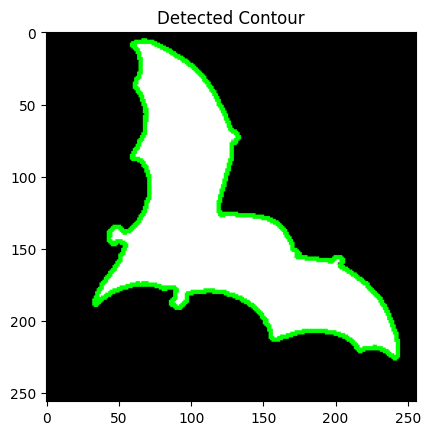

In [10]:
import matplotlib.pyplot as plt

# Draw the contour on the original image
image_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color
cv2.drawContours(image_contour, [largest_contour], -1, (0, 255, 0), 2)  # Green contour

# Display image
plt.imshow(image_contour)
plt.title("Detected Contour")
plt.show()



In [11]:
from google.colab import files
import zipfile
import os

# Upload ZIP file manually
uploaded = files.upload()

# Extract the ZIP file
zip_path = "Preprocesseddata.zip"  # Change if your zip name is different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Extract to /content/

# Check if files are extracted
print("✅ Files extracted. Folder contains:", os.listdir("/content/Preprocesseddata"))


Saving Preprocesseddata.zip to Preprocesseddata.zip
✅ Files extracted. Folder contains: ['key-14.png', 'jar-15.png', 'shoe-19.png', 'classic13.png', 'bat-14_frame1.png', 'camel-4_frame1.png', 'device7_8.png', 'shoe-1.png', 'classic12.png', 'Misk-10.png', 'shoe-3.png', 'fly-2.png', 'device3_14.png', 'Bone-5_frame1.png', 'shoe-7.png', 'fork-9.png', 'HCircle-10.png', 'pocket-11.png', 'cellular_phone-20_frame1.png', 'elephant11.png', 'Bone-9_frame1.png', 'device3_11.png', 'fly-14.png', 'jar-4.png', 'camel-16_frame1.png', 'camel-17_frame1.png', 'classic11.png', 'brick-18_frame1.png', 'device3_8.png', 'brick-08_frame1.png', 'brick-01_frame1.png', 'Glas-16.png', 'classic8.png', 'pocket-6.png', 'pocket-15.png', 'HCircle-15.png', 'key-1.png', 'HCircle-6.png', 'bat-19_frame1.png', 'fork-19.png', 'new_deer15.png', 'Misk-16.png', 'device7_13.png', 'key-13.png', 'new_deer17.png', 'device7_2.png', 'device3_20.png', 'device3_10.png', 'brick-05_frame1.png', 'Misk-6.png', 'device3_12.png', 'cellular_ph

In [12]:
import cv2
import numpy as np
import mahotas
import os
import pandas as pd

# Path to the folder containing images (Update this if using Google Drive)
image_folder = "/content/Preprocesseddata"  # Change this if necessary

# List to store feature vectors
feature_vectors = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):  # Process only PNG images
        file_path = os.path.join(image_folder, filename)

        # Load image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        # Check if image is loaded correctly
        if image is None:
            print(f"❌ Error loading {filename}")
            continue

        # Find contours
        contours, _ = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            print(f"❌ No contours detected in {filename}")
            continue

        # Sort contours by area (largest first)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Select the largest contour
        largest_contour = contours[0]

        # Get bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Use half of the smallest dimension as the radius
        radius = min(w, h) // 2

        # Compute Zernike moments (degree=8 for good shape detail)
        zernike_moments = mahotas.features.zernike_moments(image, radius, degree=8)

        # Append filename and feature vector to list
        feature_vectors.append([filename] + list(zernike_moments))

print("✅ Feature extraction completed!")

# Convert to DataFrame and save as CSV
columns = ["Filename"] + [f"Zernike_{i}" for i in range(len(zernike_moments))]
df = pd.DataFrame(feature_vectors, columns=columns)
df.to_csv("zernike_features.csv", index=False)

print("✅ Zernike moments saved to zernike_features.csv")


✅ Feature extraction completed!
✅ Zernike moments saved to zernike_features.csv


In [13]:
import pandas as pd

# Load extracted features
csv_file = "zernike_features.csv"  # Change if needed
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())


            Filename  Zernike_0  Zernike_1  Zernike_2  Zernike_3  Zernike_4  \
0         key-14.png    0.31831   0.091055   0.113198   0.040836   0.008494   
1         jar-15.png    0.31831   0.009736   0.046662   0.039882   0.006200   
2        shoe-19.png    0.31831   0.028860   0.061596   0.067351   0.012721   
3      classic13.png    0.31831   0.024466   0.117215   0.069452   0.010416   
4  bat-14_frame1.png    0.31831   0.026534   0.363570   0.109125   0.133187   

   Zernike_5  Zernike_6  Zernike_7  Zernike_8  ...  Zernike_15  Zernike_16  \
0   0.139662   0.022499   0.020695   0.052625  ...    0.013248    0.004276   
1   0.012047   0.043232   0.035658   0.015471  ...    0.022090    0.015590   
2   0.057263   0.019418   0.021705   0.031141  ...    0.012728    0.010832   
3   0.109033   0.040249   0.028303   0.034176  ...    0.013040    0.011187   
4   0.160259   0.090357   0.175090   0.058744  ...    0.101707    0.082874   

   Zernike_17  Zernike_18  Zernike_19  Zernike_20  Zerni

In [21]:
from scipy.spatial.distance import euclidean

def get_similar_images(query_features, df, top_n=25):
    similarities = []

    # Loop through dataset images
    for _, row in df.iterrows():
        filename = row["Filename"]
        image_features = row.iloc[1:].values  # Extract features (ignore filename)

        # Compute Euclidean distance
        distance = euclidean(query_features, image_features)

        similarities.append((filename, distance))

    # Sort by distance (lower = more similar)
    similarities.sort(key=lambda x: x[1])

    # Return top N most similar images
    return similarities[:top_n]


In [22]:
import cv2
import mahotas
import numpy as np

# Load query image (update the path)
query_image_path = "/content/brick-11_frame1.png"
query_image = cv2.imread(query_image_path, cv2.IMREAD_GRAYSCALE)

# Compute bounding box and radius
contours, _ = cv2.findContours(query_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

if len(contours) > 0:
    x, y, w, h = cv2.boundingRect(contours[0])
    radius = min(w, h) // 2
    query_features = mahotas.features.zernike_moments(query_image, radius, degree=8)

    # Find similar images
    similar_images = get_similar_images(query_features, df, top_n=25)

    print("🔍 Top 30 similar images:")
    for img_name, score in similar_images:
        print(f"{img_name} → Similarity Score: {score:.4f}")
else:
    print("❌ No object detected in the query image!")



🔍 Top 30 similar images:
brick-11_frame1.png → Similarity Score: 0.0000
brick-07_frame1.png → Similarity Score: 0.0166
brick-02_frame1.png → Similarity Score: 0.0178
brick-20_frame1.png → Similarity Score: 0.0179
brick-03_frame1.png → Similarity Score: 0.0338
brick-19_frame1.png → Similarity Score: 0.0379
brick-09_frame1.png → Similarity Score: 0.0393
brick-05_frame1.png → Similarity Score: 0.0409
brick-12_frame1.png → Similarity Score: 0.0409
brick-01_frame1.png → Similarity Score: 0.0446
brick-15_frame1.png → Similarity Score: 0.0454
brick-04_frame1.png → Similarity Score: 0.0479
brick-18_frame1.png → Similarity Score: 0.0514
brick-17_frame1.png → Similarity Score: 0.0518
brick-10_frame1.png → Similarity Score: 0.0532
brick-16_frame1.png → Similarity Score: 0.0574
shoe-14.png → Similarity Score: 0.0639
brick-06_frame1.png → Similarity Score: 0.0765
brick-14_frame1.png → Similarity Score: 0.0768
brick-13_frame1.png → Similarity Score: 0.0787
teddy-6.png → Similarity Score: 0.0809
bric

In [23]:
import numpy as np
import pandas as pd

# ✅ Load your dataset features (Make sure this file has image names and features)
df = pd.read_csv("zernike_features.csv")  # Adjust filename if needed

# ✅ Extract Image Names and Features
image_names = df.iloc[:, 0].values  # First column has image names
dataset_features = df.iloc[:, 1:].values  # Remaining columns have features
    # Example mapping of images to their classes
relevant_images_map = {
        "bat-1_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ], # Add all relevant images for this query       "bat-1_frame1.png":
        "bat-2_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-3_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-4_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-5_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-6_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-7_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-8_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-9_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-10_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-11_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-12_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-13_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-14_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-15_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-16_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-17_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-18_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-19_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "bat-20_frame1.png": ["bat-1_frame1.png", "bat-2_frame1.png", "bat-3_frame1.png", "bat-4_frame1.png", "bat-5_frame1.png", "bat-6_frame1.png", "bat-7_frame1.png", "bat-8_frame1.png", "bat-9_frame1.png", "bat-10_frame1.png", "bat-11_frame1.png", "bat-12_frame1.png", "bat-13_frame1.png", "bat-14_frame1.png", "bat-15_frame1.png", "bat-16_frame1.png", "bat-17_frame1.png", "bat-18_frame1.png", "bat-19_frame1.png" , "bat-20_frame1.png" ],
        "Bone-1_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-2_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-3_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-4_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-5_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-6_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-7_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-8_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-9_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-10_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-11_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-12_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-13_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-14_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-15_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-16_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-17_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-18_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-19_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "Bone-20_frame1.png": ["Bone-1_frame1.png", "Bone-2_frame1.png", "Bone-3_frame1.png", "Bone-4_frame1.png", "Bone-5_frame1.png", "Bone-6_frame1.png", "Bone-7_frame1.png", "Bone-8_frame1.png", "Bone-9_frame1.png", "Bone-10_frame1.png", "Bone-11_frame1.png","Bone-12_frame1.png","Bone-13_frame1.png","Bone-14_frame1.png","Bone-15_frame1.png","Bone-16_frame1.png","Bone-17_frame1.png","Bone-18_frame1.png","Bone-19_frame1.png","Bone-20_frame1.png"],
        "brick-01_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-02_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-03_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-04_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-05_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-06_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-07_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-08_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-09_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-10_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-11_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-12_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-13_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-14_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-15_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-16_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-17_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-18_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-19_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "brick-20_frame1.png": ["brick-01_frame1.png", "brick-02_frame1.png", "brick-03_frame1.png", "brick-04_frame1.png", "brick-05_frame1.png", "brick-06_frame1.png", "brick-07_frame1.png", "brick-08_frame1.png", "brick-09_frame1.png", "brick-10_frame1.png", "brick-11_frame1.png","brick-12_frame1.png", "brick-13_frame1.png", "brick-14_frame1.png", "brick-15_frame1.png", "brick-16_frame1.png", "brick-17_frame1.png","brick-18_frame1.png", "brick-19_frame1.png","brick-20_frame1.png"],
        "camel-1_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-2_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-3_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-4_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-5_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-6_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-7_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-8_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-9_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-10_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-11_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-12_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-13_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-14_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-15_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-16_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-17_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-18_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-19_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "camel-20_frame1.png": ["camel-1_frame1.png", "camel-2_frame1.png", "camel-3_frame1.png", "camel-4_frame1.png", "camel-5_frame1.png", "camel-6_frame1.png", "camel-7_frame1.png", "camel-8_frame1.png", "camel-9_frame1.png", "camel-10_frame1.png", "camel-11_frame1.png","camel-12_frame.png", "camel-13_frame1.png", "camel-14_frame1.png", "camel-15_frame1.png","camel-16_frame1.png","camel-17_frame1.png","camel-18_frame1.png","camel-19_frame1.png","camel-20_frame1.png"],
        "cellular_phone-1_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-2_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-3_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-4_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-5_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-6_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-7_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-8_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-9_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-10_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-11_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-12_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-13_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-14_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-15_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-16_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-17_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-18_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-19_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "cellular_phone-20_frame1.png": ["cellular_phone-1_frame1.png", "cellular_phone-2_frame1.png","cellular_phone-3_frame1.png","cellular_phone-4_frame1.png","cellular_phone-5_frame1.png","cellular_phone-6_frame1.png","cellular_phone-7_frame1.png","cellular_phone-8_frame1.png","cellular_phone-9_frame1.png","cellular_phone-10_frame1.png","cellular_phone-11_frame1.png","cellular_phone-12_frame1.png","cellular_phone-13_frame1.png","cellular_phone-14_frame1.png","cellular_phone-15_frame1.png","cellular_phone-1_frame16.png","cellular_phone-17_frame1.png","cellular_phone-18_frame1.png","cellular_phone-19_frame1.png","cellular_phone-20_frame1.png"],
        "classic1.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic2.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic3.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic4.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic5.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic6.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic7.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic8.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic9.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic10.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic11.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic12.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic13.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic14.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic15.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic16.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic17.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic18.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic19.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "classic20.png": {"classic1.png", "classic2.png","classic3.png", "classic4.png","classic5.png","classic6.png","classic7.png","classic8.png","classic9.png", "classic10.png", "classic11.png","classic12.png","classic13.png","classic14.png","classic15.png","classic16.png","classic17.png","classic18.png","classic19.png","classic20.png"},
        "device3_1.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_2.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_3.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_4.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_5.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_6.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_7.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_8.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_9.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_10.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_11.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_12.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_13.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_14.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_15.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_16.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_17.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_18.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_19.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device3_20.png": ["device3_1.png", "device3_2.png", "device3_3.png", "device3_4.png", "device3_5.png", "device3_6.png", "device3_7.png", "device3_8.png", "device3_9.png", "device3_10.png", "device3_11.png","device3_12.png", "device3_13.png", "device3_14.png", "device3_15.png", "device3_16.png", "device3_17.png", "device3_18.png", "device3_19.png", "device3_20.png"],
        "device7_1.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_2.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_3.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_4.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_5.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_6.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_7.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_8.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_9.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_10.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_11.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_12.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_13.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_14.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_15.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_16.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_17.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_18.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_19.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "device7_20.png": ["device7_1.png", "device7_2.png","device7_3.png", "device7_4.png", "device7_5.png", "device7_6.png", "device7_7.png", "device7_8.png", "device7_9.png", "device7_10.png", "device7_11.png", "device7_12.png","device7_13.png", "device7_14.png", "device7_15.png", "device7_16.png","device7_17.png","device7_18.png","device7_19.png","device7_20.png"],
        "elephant1.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant2.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant3.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant4.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant5.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant6.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant7_new.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant8_new.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant9_new.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant10.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant11.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant12.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant13_new.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant14.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant15.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant16.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant17.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant18.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant19.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "elephant20.png":["elephant1.png", "elephant2.png", "elephant3.png", "elephant4.png", "elephant5.png", "elephant6.png", "elephant7_new.png", "elephant8_new.png", "elephant9_new.png", "elephant10_new.png", "elephant11.png", "elephant12.png", "elephant13_new.png", "elephant14.png", "elephant15.png", "elephant16.png", "elephant17.png", "elephant18.png", "elephant19.png", "elephant20.png" ],
        "fly-1.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-2.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-3.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-4.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-5.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-6.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-7.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-8.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-9.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-10.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-11.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-12.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-13.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-14.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-15.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-16.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-17.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-18.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-19.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fly-20.png":["fly-1.png", "fly-2.png", "fly-3.png","fly-4.png","fly-5.png", "fly-6.png", "fly-7.png","fly-8.png","fly-9.png","fly-10.png","fly-11.png","fly-12.png","fly-13.png","fly-14.png","fly-15.png","fly-16.png","fly-17.png","fly-18.png","fly-19.png","fly-20.png" ],
        "fork-1.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-2.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-3.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-4.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-5.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-6.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-7.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-8.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-9.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-10.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-11.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-12.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-13.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-14.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-15.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-16.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-17.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-18.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-19.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "fork-20.png":["fork-1.png", "fork-2.png","fork-3.png","fork-4.png","fork-5.png","fork-6.png","fork-7.png","fork-8.png","fork-9.png","fork-10.png","fork-11.png","fork-12.png","fork-13.png","fork-14.png","fork-15.png","fork-16.png","fork-17.png","fork-18.png","fork-19.png","fork-20.png"],
        "Glas-1.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-2.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-3.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-4.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-5.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-6.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-7.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-8.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-9.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-10.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-11.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-12.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-13.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-14.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-15.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-16.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-17.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-18.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-19.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "Glas-20.png": ["Glas-1.png", "Glas-2.png", "Glas-3.png", "Glas-4.png", "Glas-5.png", "Glas-6.png", "Glas-7.png", "Glas-8.png", "Glas-9.png", "Glas-10.png", "Glas-11.png", "Glas-12.png", "Glas-13.png", "Glas-14.png", "Glas-15.png", "Glas-16.png", "Glas-17.png", "Glas-18.png", "Glas-19.png", "Glas-20.png" ],
        "HCircle-1.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-2.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-3.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-4.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-5.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-6.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-7.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-8.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-9.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-10.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-11.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-12.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-13.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-14.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-15.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-16.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-17.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-18.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-19.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "HCircle-20.png": ["HCircle-1.png", "HCircle-2.png", "HCircle-3.png", "HCircle-4.png", "HCircle-5.png", "HCircle-6.png", "HCircle-7.png", "HCircle-8.png", "HCircle-9.png", "HCircle-10.png", "HCircle-11.png", "HCircle-12.png", "HCircle-13.png", "HCircle-14.png", "HCircle-15.png", "HCircle-16.png", "HCircle-17.png", "HCircle-18.png", "HCircle-19.png", "HCircle-20.png" ],
        "jar-1.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-2.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-3.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-4.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-5.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-6.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-7.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-8.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-9.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-10.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-11.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-12.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-13.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-14.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-15.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-16.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-17.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-18.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-19.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "jar-20.png": ["jar-1.png", "jar-2.png", "jar-3.png", "jar-4.png", "jar-5.png", "jar-6.png", "jar-7.png", "jar-8.png", "jar-9.png", "jar-10.png", "jar-11.png", "jar-12.png", "jar-13.png", "jar-14.png", "jar-15.png", "jar-16.png", "jar-17.png", "jar-18.png", "jar-19.png", "jar-20.png" ],
        "key-1.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-2.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-3.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-4.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-5.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-6.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-7.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-8.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-9.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-10.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-11.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-12.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-13.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-14.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-15.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-16.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-17.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-18.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-19.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "key-20.png": ["key-1.png", "key-2.png", "key-3.png", "key-4.png", "key-5.png", "key-6.png", "key-7.png", "key-8.png", "key-9.png", "key-10.png", "key-11.png", "key-12.png", "key-13.png", "key-14.png", "key-15.png", "key-16.png", "key-17.png", "key-18.png", "key-19.png", "key-20.png" ],
        "Misk-1.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-2.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-3.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-4.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-5.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-6.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-7.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-8.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-9.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-10.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-11.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-12.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-13.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-14.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-15.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-16.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-17.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-18.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-19.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "Misk-20.png": ["Misk-1.png", "Misk-2.png", "Misk-3.png", "Misk-4.png", "Misk-5.png", "Misk-6.png", "Misk-7.png", "Misk-8.png", "Misk-9.png", "Misk-10.png", "Misk-11.png", "Misk-12.png", "Misk-13.png", "Misk-14.png", "Misk-15.png", "Misk-16.png", "Misk-17.png", "Misk-18.png", "Misk-19.png", "Misk-20.png" ],
        "new_deer1.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer2.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer3.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer4.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer5.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer6.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer7.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer8.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer9.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer10.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer11.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer12.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer13.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer14.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer15.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer16.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer17.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer18.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer19.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "new_deer20.png": ["new_deer1.png", "new_deer2.png", "new_deer3.png", "new_deer4.png", "new_deer5.png", "new_deer6.png", "new_deer7.png", "new_deer8.png", "new_deer9.png", "new_deer10.png", "new_deer11.png", "new_deer12.png", "new_deer13.png", "new_deer14.png", "new_deer15.png", "new_deer16.png", "new_deer17.png", "new_deer18.png", "new_deer19.png", "new_deer20.png" ],
        "pocket-1.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-2.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-3.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-4.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-5.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-6.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-7.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-8.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-9.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-10.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-11.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-12.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-13.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-14.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-15.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-16.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-17.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-18.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-19.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "pocket-20.png": {"pocket-1.png", "pocket-2.png", "pocket-3.png", "pocket-4.png", "pocket-5.png", "pocket-6.png", "pocket-7.png", "pocket-8.png", "pocket-9.png", "pocket-10.png", "pocket-11.png", "pocket-12.png", "pocket-13.png", "pocket-14.png", "pocket-15.png", "pocket-16.png", "pocket-17.png", "pocket-18.png", "pocket-19.png", "pocket-20.png"  },
        "shoe-1.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-2.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-3.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-4.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-5.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-6.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-7.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-8.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-9.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-10.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-11.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-12.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-13.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-14.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-15.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-16.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-17.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-18.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-19.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "shoe-20.png": ["shoe-1.png", "shoe-2.png", "shoe-3.png", "shoe-4.png", "shoe-5.png", "shoe-6.png", "shoe-7.png", "shoe-8.png", "shoe-9.png", "shoe-10.png", "shoe-11.png", "shoe-12.png", "shoe-13.png", "shoe-14.png", "shoe-15.png", "shoe-16.png", "shoe-17.png", "shoe-18.png", "shoe-19.png", "shoe-20.png" ],
        "teddy-1.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-2.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-3.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-4.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-5.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-6.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-7.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-8.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-9.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-10.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-11.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-12.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-13.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-14.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-15.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-16.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-17.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-18.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-19.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],
        "teddy-20.png": ["teddy-1.png", "teddy-2.png", "teddy-3.png", "teddy-4.png", "teddy-5.png", "teddy-6.png", "teddy-7.png", "teddy-8.png", "teddy-9.png", "teddy-10.png", "teddy-11.png", "teddy-12.png", "teddy-13.png", "teddy-14.png", "teddy-15.png", "teddy-16.png", "teddy-17.png", "teddy-18.png", "teddy-19.png", "teddy-20.png" ],

        # Add other images and their relevant counterparts
        # Complete this mapping based on your dataset
    }

# Function to get relevant images (with safe check)
def get_relevant_images(query_image_name):
    # Lookup the relevant images from the pre-defined mapping
    return relevant_images_map.get(query_image_name, [])

# Evaluate function to compute y_true and y_scores
def evaluate_query(query_image_name, query_features, top_n=25):
    y_scores = []  # Stores similarity scores (distances)
    y_true = []  # Stores relevance (1 = relevant, 0 = not relevant)

    # Loop through dataset and compute distances
    for img_name, features in zip(image_names, dataset_features):
        distance = np.linalg.norm(query_features - features)  # Euclidean distance
        y_scores.append(distance)

        # Define Relevant Images using manual mapping
        relevant_images = get_relevant_images(query_image_name)

        # Check for valid relevant images
        if relevant_images is None:
            relevant_images = []

        y_true.append(1 if img_name in relevant_images else 0)  # Mark as relevant or not

    # Convert lists to NumPy arrays
    y_scores = np.array(y_scores)
    y_true = np.array(y_true)

    # Sort images by similarity (lower distances are better)
    sorted_indices = np.argsort(y_scores)  # Get sorted indices
    y_scores = y_scores[sorted_indices]  # Sort distances
    y_true = y_true[sorted_indices]  # Sort relevance accordingly

    # Select Top-N retrieved images
    y_scores = y_scores[:top_n]
    y_true = y_true[:top_n]

    return y_true, y_scores


# Loop through all images in the dataset (Use each image as a query)
for query_index in range(len(image_names)):
    query_image_name = image_names[query_index]  # Query image name
    query_features = dataset_features[query_index]  # Query features

    # Get `y_true` and `y_scores` for this query
    y_true, y_scores = evaluate_query(query_image_name, query_features)



In [24]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

# Initialize lists to store precision, recall, and AUC values
all_precisions = []
all_recalls = []
all_aucs = []

# Loop through all images in the dataset (Use each image as a query)
for query_index in range(len(image_names)):
    query_image_name = image_names[query_index]  # Query image name
    query_features = dataset_features[query_index]  # Query features

    # Get y_true and y_scores for this query
    y_true, y_scores = evaluate_query(query_image_name, query_features)

    # Check if y_true has at least one positive sample (relevant image)
    if np.any(y_true):  # There are relevant images
        # Compute precision-recall curve
        precisions, recalls, _ = precision_recall_curve(y_true, -y_scores)  # Invert scores for sklearn

        # Compute AUC for PR curve
        pr_auc = auc(recalls, precisions)

        # Compute mean precision and mean recall
        mean_precision = np.mean(precisions)
        mean_recall = np.mean(recalls)

        # Store results
        all_precisions.append(mean_precision)
        all_recalls.append(mean_recall)
        all_aucs.append(pr_auc)

        print(f"Query {query_index+1}/{len(image_names)} → Precision: {mean_precision:.4f}, Recall: {mean_recall:.4f}, AUC: {pr_auc:.4f}")
    else:
        print(f"Query {query_index+1}/{len(image_names)} has no relevant images, skipping...")

# Compute Overall Average Precision and Recall
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)

print(f"\n✅ Average Precision: {avg_precision:.4f}")
print(f"✅ Average Recall: {avg_recall:.4f}")

Query 1/400 → Precision: 0.8420, Recall: 0.7231, AUC: 0.9851
Query 2/400 → Precision: 0.8009, Recall: 0.5675, AUC: 0.8250
Query 3/400 → Precision: 0.8920, Recall: 0.6613, AUC: 0.9737
Query 4/400 → Precision: 0.8342, Recall: 0.7071, AUC: 0.9615
Query 5/400 → Precision: 0.6825, Recall: 0.6183, AUC: 0.7089
Query 6/400 → Precision: 0.6574, Recall: 0.5412, AUC: 0.6667
Query 7/400 → Precision: 0.9756, Recall: 0.5962, AUC: 1.0000
Query 8/400 → Precision: 0.9076, Recall: 0.6587, AUC: 0.9791
Query 9/400 → Precision: 0.5710, Recall: 0.5940, AUC: 0.7181
Query 10/400 → Precision: 0.6484, Recall: 0.6966, AUC: 0.8495
Query 11/400 → Precision: 0.7467, Recall: 0.6506, AUC: 0.8660
Query 12/400 → Precision: 0.7134, Recall: 0.6818, AUC: 0.8377
Query 13/400 → Precision: 0.4829, Recall: 0.8240, AUC: 0.8718
Query 14/400 → Precision: 0.9680, Recall: 0.5885, AUC: 0.9908
Query 15/400 → Precision: 0.7108, Recall: 0.7867, AUC: 0.9644
Query 16/400 → Precision: 0.4926, Recall: 0.5577, AUC: 0.6194
Query 17/400 → Pr

Query 1/400 → AUC: 0.9851
Query 2/400 → AUC: 0.8250
Query 3/400 → AUC: 0.9737
Query 4/400 → AUC: 0.9615
Query 5/400 → AUC: 0.7089
Query 6/400 → AUC: 0.6667
Query 7/400 → AUC: 1.0000
Query 8/400 → AUC: 0.9791
Query 9/400 → AUC: 0.7181
Query 10/400 → AUC: 0.8495
Query 11/400 → AUC: 0.8660
Query 12/400 → AUC: 0.8377
Query 13/400 → AUC: 0.8718
Query 14/400 → AUC: 0.9908
Query 15/400 → AUC: 0.9644
Query 16/400 → AUC: 0.6194
Query 17/400 → AUC: 0.9756
Query 18/400 → AUC: 0.9680
Query 19/400 → AUC: 0.9128
Query 20/400 → AUC: 0.4834
Query 21/400 → AUC: 0.9908
Query 22/400 → AUC: 0.6179
Query 23/400 → AUC: 0.7917
Query 24/400 → AUC: 0.9260
Query 25/400 → AUC: 0.6810
Query 26/400 → AUC: 0.4369
Query 27/400 → AUC: 0.7457
Query 28/400 → AUC: 0.9665
Query 29/400 → AUC: 0.7170
Query 30/400 → AUC: 0.9418
Query 31/400 → AUC: 0.9919
Query 32/400 → AUC: 0.7587
Query 33/400 → AUC: 0.8984
Query 34/400 → AUC: 0.9024
Query 35/400 → AUC: 1.0000
Query 36/400 → AUC: 0.9444
Query 37/400 → AUC: 0.9435
Query 38/4

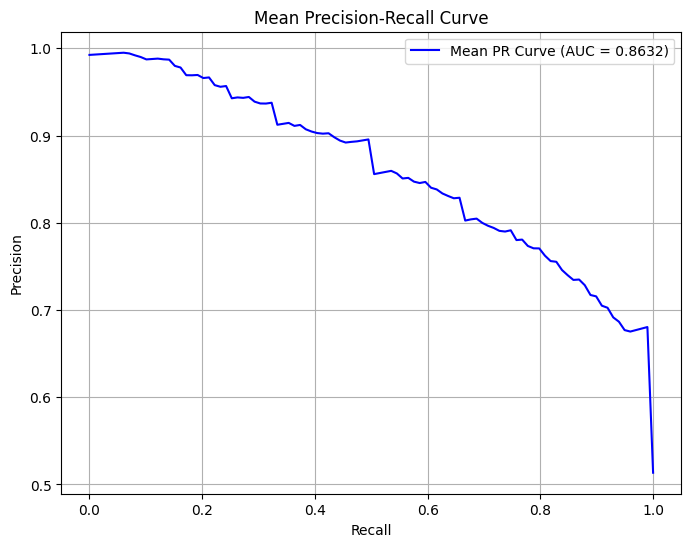

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Initialize lists to store precision, recall, and AUC values
all_precisions = []
all_recalls = []
all_aucs = []
recall_levels = np.linspace(0, 1, 100)  # Fixed recall levels (for averaging curves)

# Initialize array to store interpolated precision values for averaging
interp_precisions = np.zeros_like(recall_levels)

# Loop through all images in the dataset (Use each image as a query)
for query_index in range(len(image_names)):
    query_image_name = image_names[query_index]  # Query image name
    query_features = dataset_features[query_index]  # Query features

    # Get `y_true` and `y_scores` for this query
    y_true, y_scores = evaluate_query(query_image_name, query_features)

    # Check if y_true has at least one positive sample (relevant image)
    if np.any(y_true):  # There are relevant images
        # Compute precision-recall curve
        precisions, recalls, _ = precision_recall_curve(y_true, -y_scores)  # Invert scores for sklearn

        # Compute AUC for PR curve
        pr_auc = auc(recalls, precisions)

        # Store AUC
        all_aucs.append(pr_auc)

        # Interpolate precision values at fixed recall levels for averaging
        interp_prec = np.interp(recall_levels, np.flip(recalls), np.flip(precisions))
        interp_precisions += interp_prec  # Sum up for mean calculation

        print(f"Query {query_index+1}/{len(image_names)} → AUC: {pr_auc:.4f}")

# Compute Mean Precision-Recall Curve
mean_precision = interp_precisions / len(all_aucs)  # Mean precision across queries
mean_auc = np.mean(all_aucs)  # Mean AUC across queries

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_levels, mean_precision, label=f"Mean PR Curve (AUC = {mean_auc:.4f})", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Mean Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [26]:
#Code for GUI
!pip install ipywidgets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00


FileUpload(value={'bat-1_frame1.png': {'metadata': {'name': 'bat-1_frame1.png', 'type': 'image/png', 'size': 6…

🔍 Top 30 similar images:
bat-1_frame1.png → Similarity Score: 0.0000


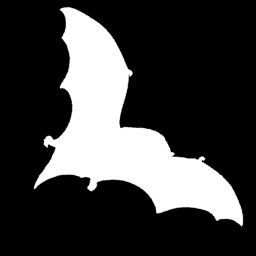

bat-19_frame1.png → Similarity Score: 0.0904


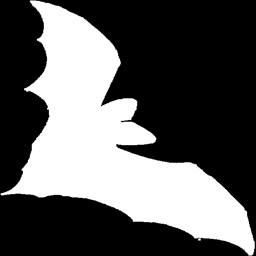

bat-18_frame1.png → Similarity Score: 0.0904


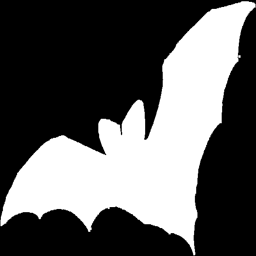

bat-4_frame1.png → Similarity Score: 0.1187


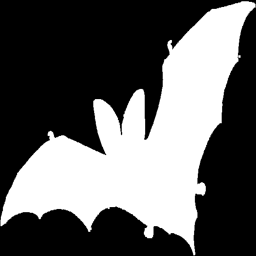

bat-13_frame1.png → Similarity Score: 0.1751


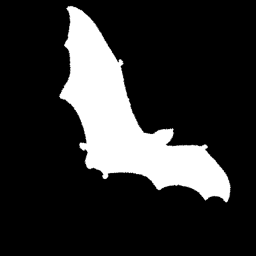

bat-9_frame1.png → Similarity Score: 0.1773


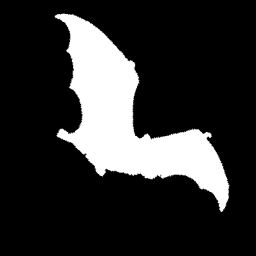

bat-15_frame1.png → Similarity Score: 0.1917


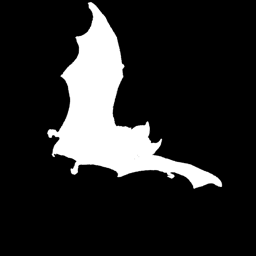

bat-2_frame1.png → Similarity Score: 0.2022


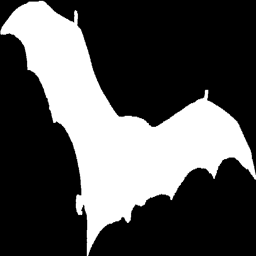

bat-7_frame1.png → Similarity Score: 0.2040


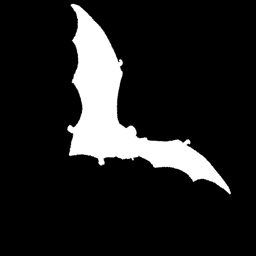

bat-3_frame1.png → Similarity Score: 0.2114


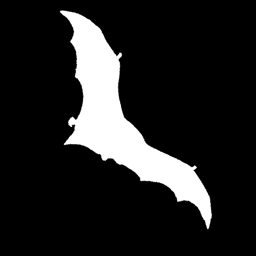

new_deer18.png → Similarity Score: 0.2392


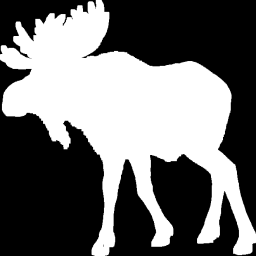

camel-5_frame1.png → Similarity Score: 0.2394


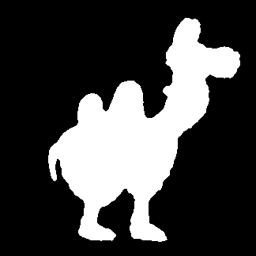

fly-2.png → Similarity Score: 0.2530


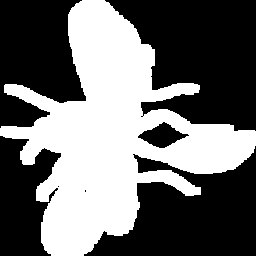

fly-3.png → Similarity Score: 0.2540


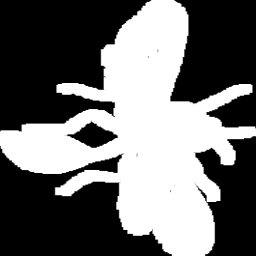

new_deer17.png → Similarity Score: 0.2572


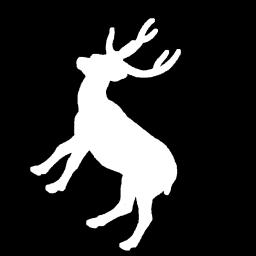

new_deer20.png → Similarity Score: 0.2575


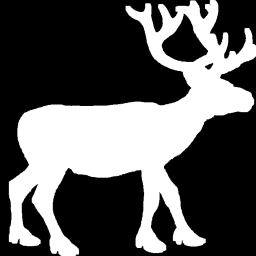

new_deer4.png → Similarity Score: 0.2577


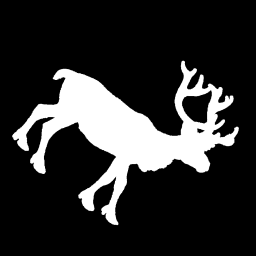

Glas-20.png → Similarity Score: 0.2583


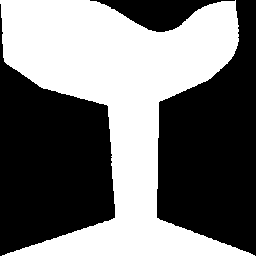

new_deer2.png → Similarity Score: 0.2583


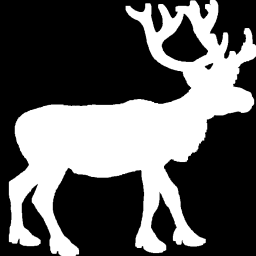

fork-4.png → Similarity Score: 0.2585


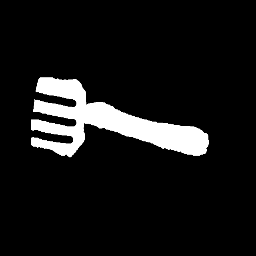

fly-16.png → Similarity Score: 0.2587


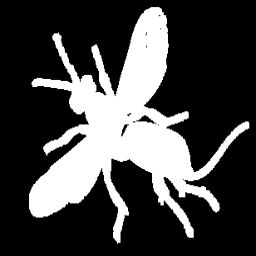

new_deer3.png → Similarity Score: 0.2598


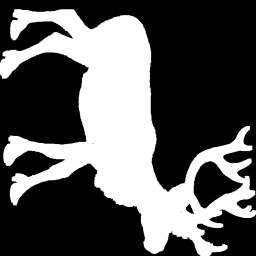

new_deer14.png → Similarity Score: 0.2601


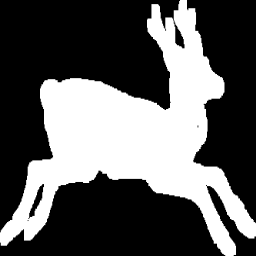

bat-14_frame1.png → Similarity Score: 0.2611


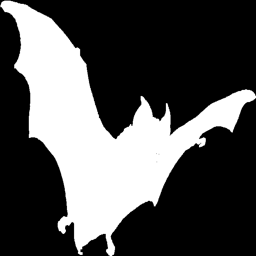

Glas-6.png → Similarity Score: 0.2635


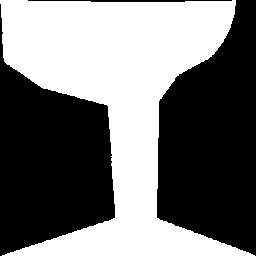

new_deer10.png → Similarity Score: 0.2637


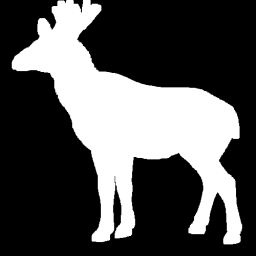

new_deer11.png → Similarity Score: 0.2637


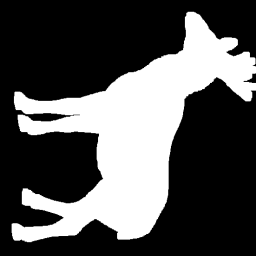

new_deer12.png → Similarity Score: 0.2643


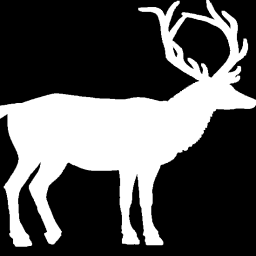

new_deer13.png → Similarity Score: 0.2643


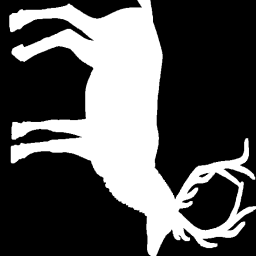

new_deer1.png → Similarity Score: 0.2657


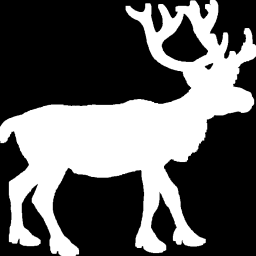

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image, clear_output, HTML
import cv2
import mahotas
import os

# Function to handle image upload and similarity search
def on_upload_change(change):
    clear_output(wait=True)
    display(upload_widget)  # Display the upload widget again

    # Get the uploaded image
    uploaded_image = change['new']
    if uploaded_image:
        # Read the uploaded image
        query_image_name = list(uploaded_image.keys())[0]
        query_image_data = uploaded_image[query_image_name]['content']

        # Save the uploaded image temporarily
        with open(query_image_name, 'wb') as f:
            f.write(query_image_data)

        # Load the query image
        query_image = cv2.imread(query_image_name, cv2.IMREAD_GRAYSCALE)

        # Compute bounding box and radius
        contours, _ = cv2.findContours(query_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        if len(contours) > 0:
            x, y, w, h = cv2.boundingRect(contours[0])
            radius = min(w, h) // 2
            query_features = mahotas.features.zernike_moments(query_image, radius, degree=8)

            # Find similar images
            similar_images = get_similar_images(query_features, df, top_n=30)  # Get top 5 similar images

            # Display the results
            print("🔍 Top 30 similar images:")
            for img_name, score in similar_images:
                print(f"{img_name} → Similarity Score: {score:.4f}")
                display(Image(filename=os.path.join(image_folder, img_name)))  # Display similar images
        else:
            print("❌ No object detected in the uploaded image!")

# Create an upload widget
upload_widget = widgets.FileUpload(
    accept='.png',  # Accept only PNG files
    multiple=False  # Allow only one file at a time
)

# Attach the change event to the upload widget
upload_widget.observe(on_upload_change, names='value')

# Display a title and instructions
display(HTML("<h2 style='color:green;'>Image Similarity Search</h2>"))
display(HTML("<p style='font-size:18px;'>Upload a PNG image to find similar images based on Zernike moments.</p>"))

# Display the upload widget
display(upload_widget)